**ROC curve generation with all models**

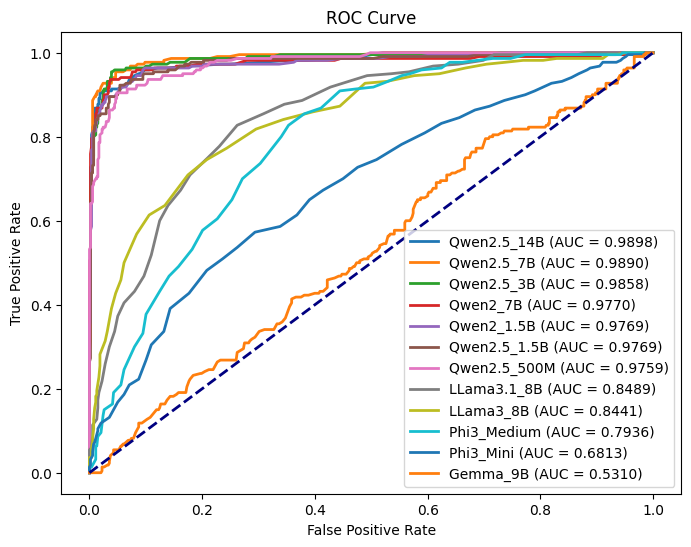

✅ ROC curve successfully saved at: /home/joaopedro/joaopedro/llm/Mestrado/curvaROC/roc_curve_sorted.png


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_roc_data(folder_path):
    roc_files = {}

    #Iterate through files in the folder
    for file in os.listdir(folder_path):
        if file.startswith(("fpr_", "tpr_", "auc_")) and file.endswith(".txt"):
            model_name = file.split("_", 1)[1].replace(".txt", "")  #Extract model name
            file_type = file.split("_")[0]  #Define file type (fpr, tpr, auc)

            if model_name not in roc_files:
                roc_files[model_name] = {}

            roc_files[model_name][file_type] = os.path.join(folder_path, file)

    #List to store processed data
    roc_data = []

    #Load data from files
    for model, files in roc_files.items():
        if "fpr" in files and "tpr" in files and "auc" in files:
            fpr = np.loadtxt(files["fpr"])
            tpr = np.loadtxt(files["tpr"])

            #Read AUC value
            with open(files["auc"], 'r') as f:
                auc_value = float(f.read().splitlines()[0].split(':')[-1].strip())

            roc_data.append({"name": model, "fpr": fpr, "tpr": tpr, "auc": auc_value})

    return roc_data

def plot_roc_curve(folder_path, output_path):
    roc_data = load_roc_data(folder_path)  #Load data from the folder
    roc_data.sort(key=lambda x: x["auc"], reverse=True)  #Sort models by AUC in descending order
    plt.figure(figsize=(8, 6)) #Create the figure

    #Iterate over sorted models and add to the plot
    for data in roc_data:
        plt.plot(data["fpr"], data["tpr"], lw=2, label=f'{data["name"]} (AUC = {data["auc"]:.4f})')

    #Diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    #Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    #Save the ROC curve to the specified directory
    plt.savefig(output_path)
    plt.show()

    print(f"✅ ROC curve successfully saved at: {output_path}")

#Define the folder containing the files and the output image path
folder_path = "/home/joaopedro/joaopedro/llm/Mestrado/curvaROC"
output_image = os.path.join(folder_path, "roc_curve_sorted.png")

#Generate and save the ROC curve
plot_roc_curve(folder_path, output_image)

**ROC curve generation with models above 0.80 in AUC**

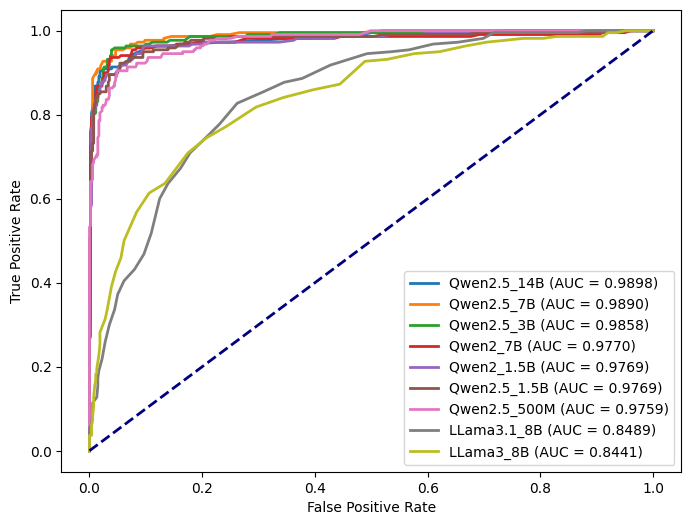

✅ ROC curve successfully saved at: /home/joaopedro/joaopedro/llm/Mestrado/curvaROC/roc_curve_filtered.png


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_roc_data(folder_path):
    roc_files = {}

    #Iterate through files in the folder
    for file in os.listdir(folder_path):
        if file.startswith(("fpr_", "tpr_", "auc_")) and file.endswith(".txt"):
            model_name = file.split("_", 1)[1].replace(".txt", "")  #Extract model name
            file_type = file.split("_")[0]  #Define file type (fpr, tpr, auc)

            if model_name not in roc_files:
                roc_files[model_name] = {}

            roc_files[model_name][file_type] = os.path.join(folder_path, file)

    #List to store processed data
    roc_data = []

    #Load data from files
    for model, files in roc_files.items():
        if "fpr" in files and "tpr" in files and "auc" in files:
            fpr = np.loadtxt(files["fpr"])
            tpr = np.loadtxt(files["tpr"])

            #Read AUC value
            with open(files["auc"], 'r') as f:
                auc_value = float(f.read().splitlines()[0].split(':')[-1].strip())

            #Only include models with AUC > 0.80
            if auc_value > 0.80:
                roc_data.append({"name": model, "fpr": fpr, "tpr": tpr, "auc": auc_value})

    return roc_data

def plot_roc_curve(folder_path, output_path):

    #Load data from the folder
    roc_data = load_roc_data(folder_path)

    #Check if there are models with AUC > 0.80
    if not roc_data:
        print("⚠️ No models with AUC greater than 0.80 were found.")
        return

    #Sort models by AUC in descending order
    roc_data.sort(key=lambda x: x["auc"], reverse=True)

    #Create the figure
    plt.figure(figsize=(8, 6))

    #Iterate over sorted models and add to the plot
    for data in roc_data:
        plt.plot(data["fpr"], data["tpr"], lw=2, label=f'{data["name"]} (AUC = {data["auc"]:.4f})')

    #Diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    #Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('')
    plt.legend(loc='lower right')

    #Save the ROC curve to the specified directory
    plt.savefig(output_path)
    plt.show()

    print(f"✅ ROC curve successfully saved at: {output_path}")

#Define the folder containing the files and the output image path
folder_path = "/home/joaopedro/joaopedro/llm/Mestrado/curvaROC"
output_image = os.path.join(folder_path, "roc_curve_filtered.png")

#Generate and save the ROC curve
plot_roc_curve(folder_path, output_image)

**Generating the Confusion Matrix**

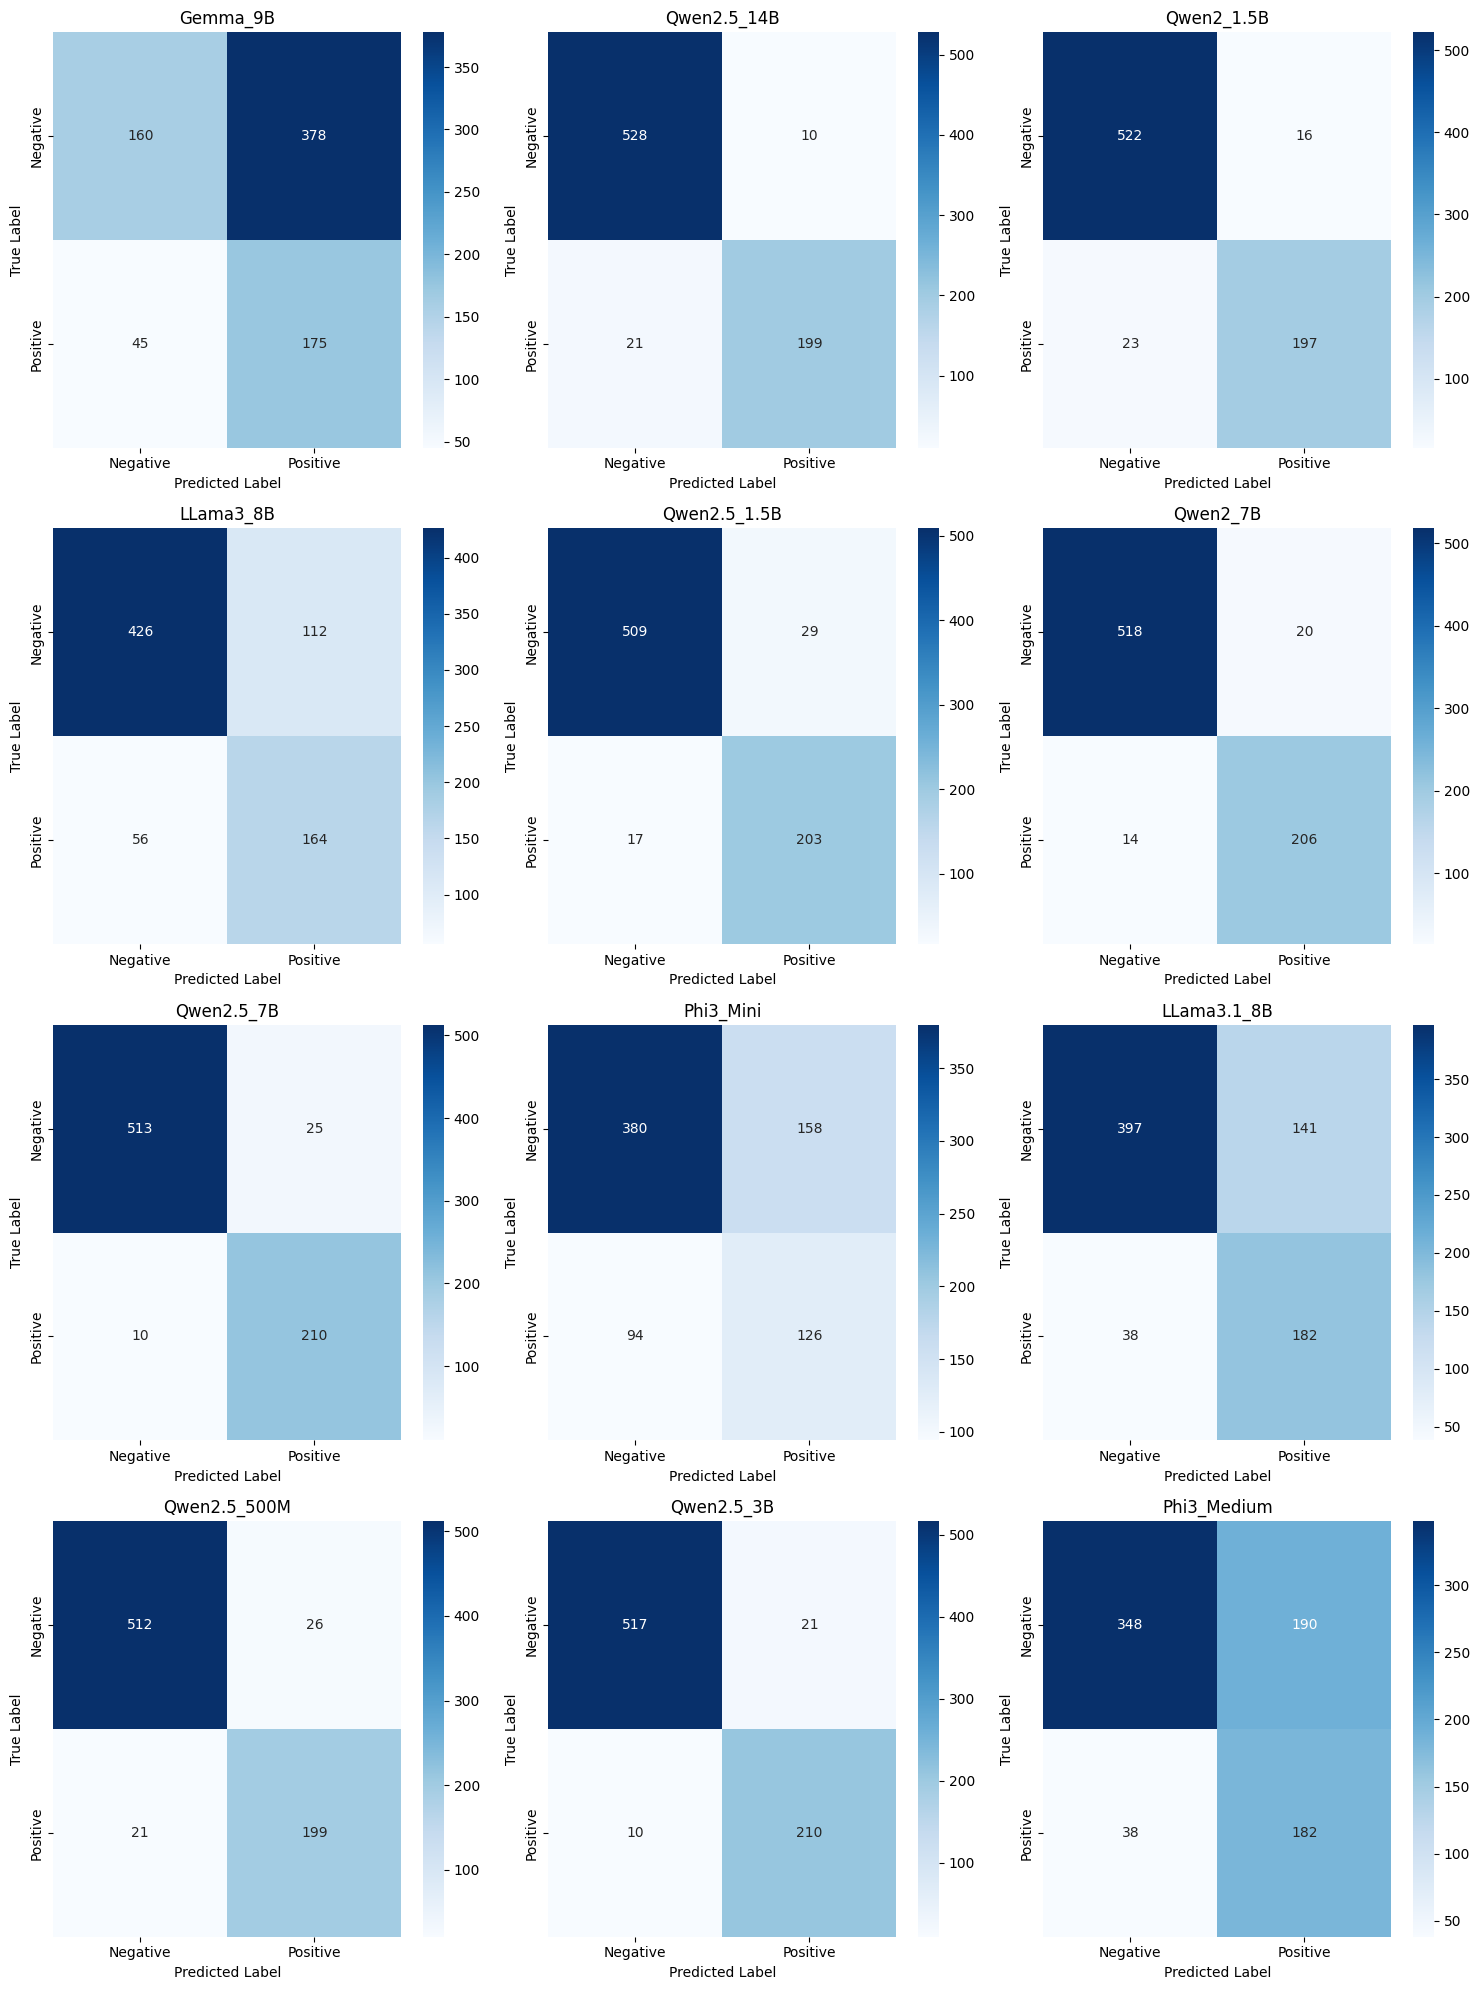

✅ Confusion matrix successfully saved at: /home/joaopedro/joaopedro/llm/Mestrado/curvaROC/confusion_matrices.png


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_confusion_matrices(folder_path):
    confusion_data = []

    #Iterate through files in the folder
    for file in os.listdir(folder_path):
        if file.startswith("confusion_matrix_") and file.endswith(".txt"):
            model_name = file.replace("confusion_matrix_", "").replace(".txt", "")  # Extract model name
            file_path = os.path.join(folder_path, file)

            #Load the confusion matrix
            matrix = np.loadtxt(file_path, dtype=int)

            confusion_data.append({"name": model_name, "matrix": matrix})

    return confusion_data

def plot_confusion_matrices(folder_path, output_path):
    #Load confusion matrix data
    confusion_data = load_confusion_matrices(folder_path)

    #Define the number of columns and rows for the subplot
    num_models = len(confusion_data)
    cols = 3  # Number of columns in the grid
    rows = (num_models // cols) + (num_models % cols > 0)  #Dynamically set the number of rows

    #Create the figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()  #Convert the subplot matrix into a list

    #Iterate over models and plot the matrices
    for i, data in enumerate(confusion_data):
        sns.heatmap(data["matrix"], annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axes[i])
        axes[i].set_title(data["name"], fontsize=12)
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")

    #Remove empty axes if the number of models is less than the number of subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    #Adjust layout and save the image
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

    print(f"✅ Confusion matrix successfully saved at: {output_path}")

#Define the folder containing the files and the output image path
folder_path = "/home/joaopedro/joaopedro/llm/Mestrado/curvaROC"
output_image = os.path.join(folder_path, "confusion_matrices.png")

#Generate and save the confusion matrices
plot_confusion_matrices(folder_path, output_image)

**Generating the Confusion Matrix without Sidebars**

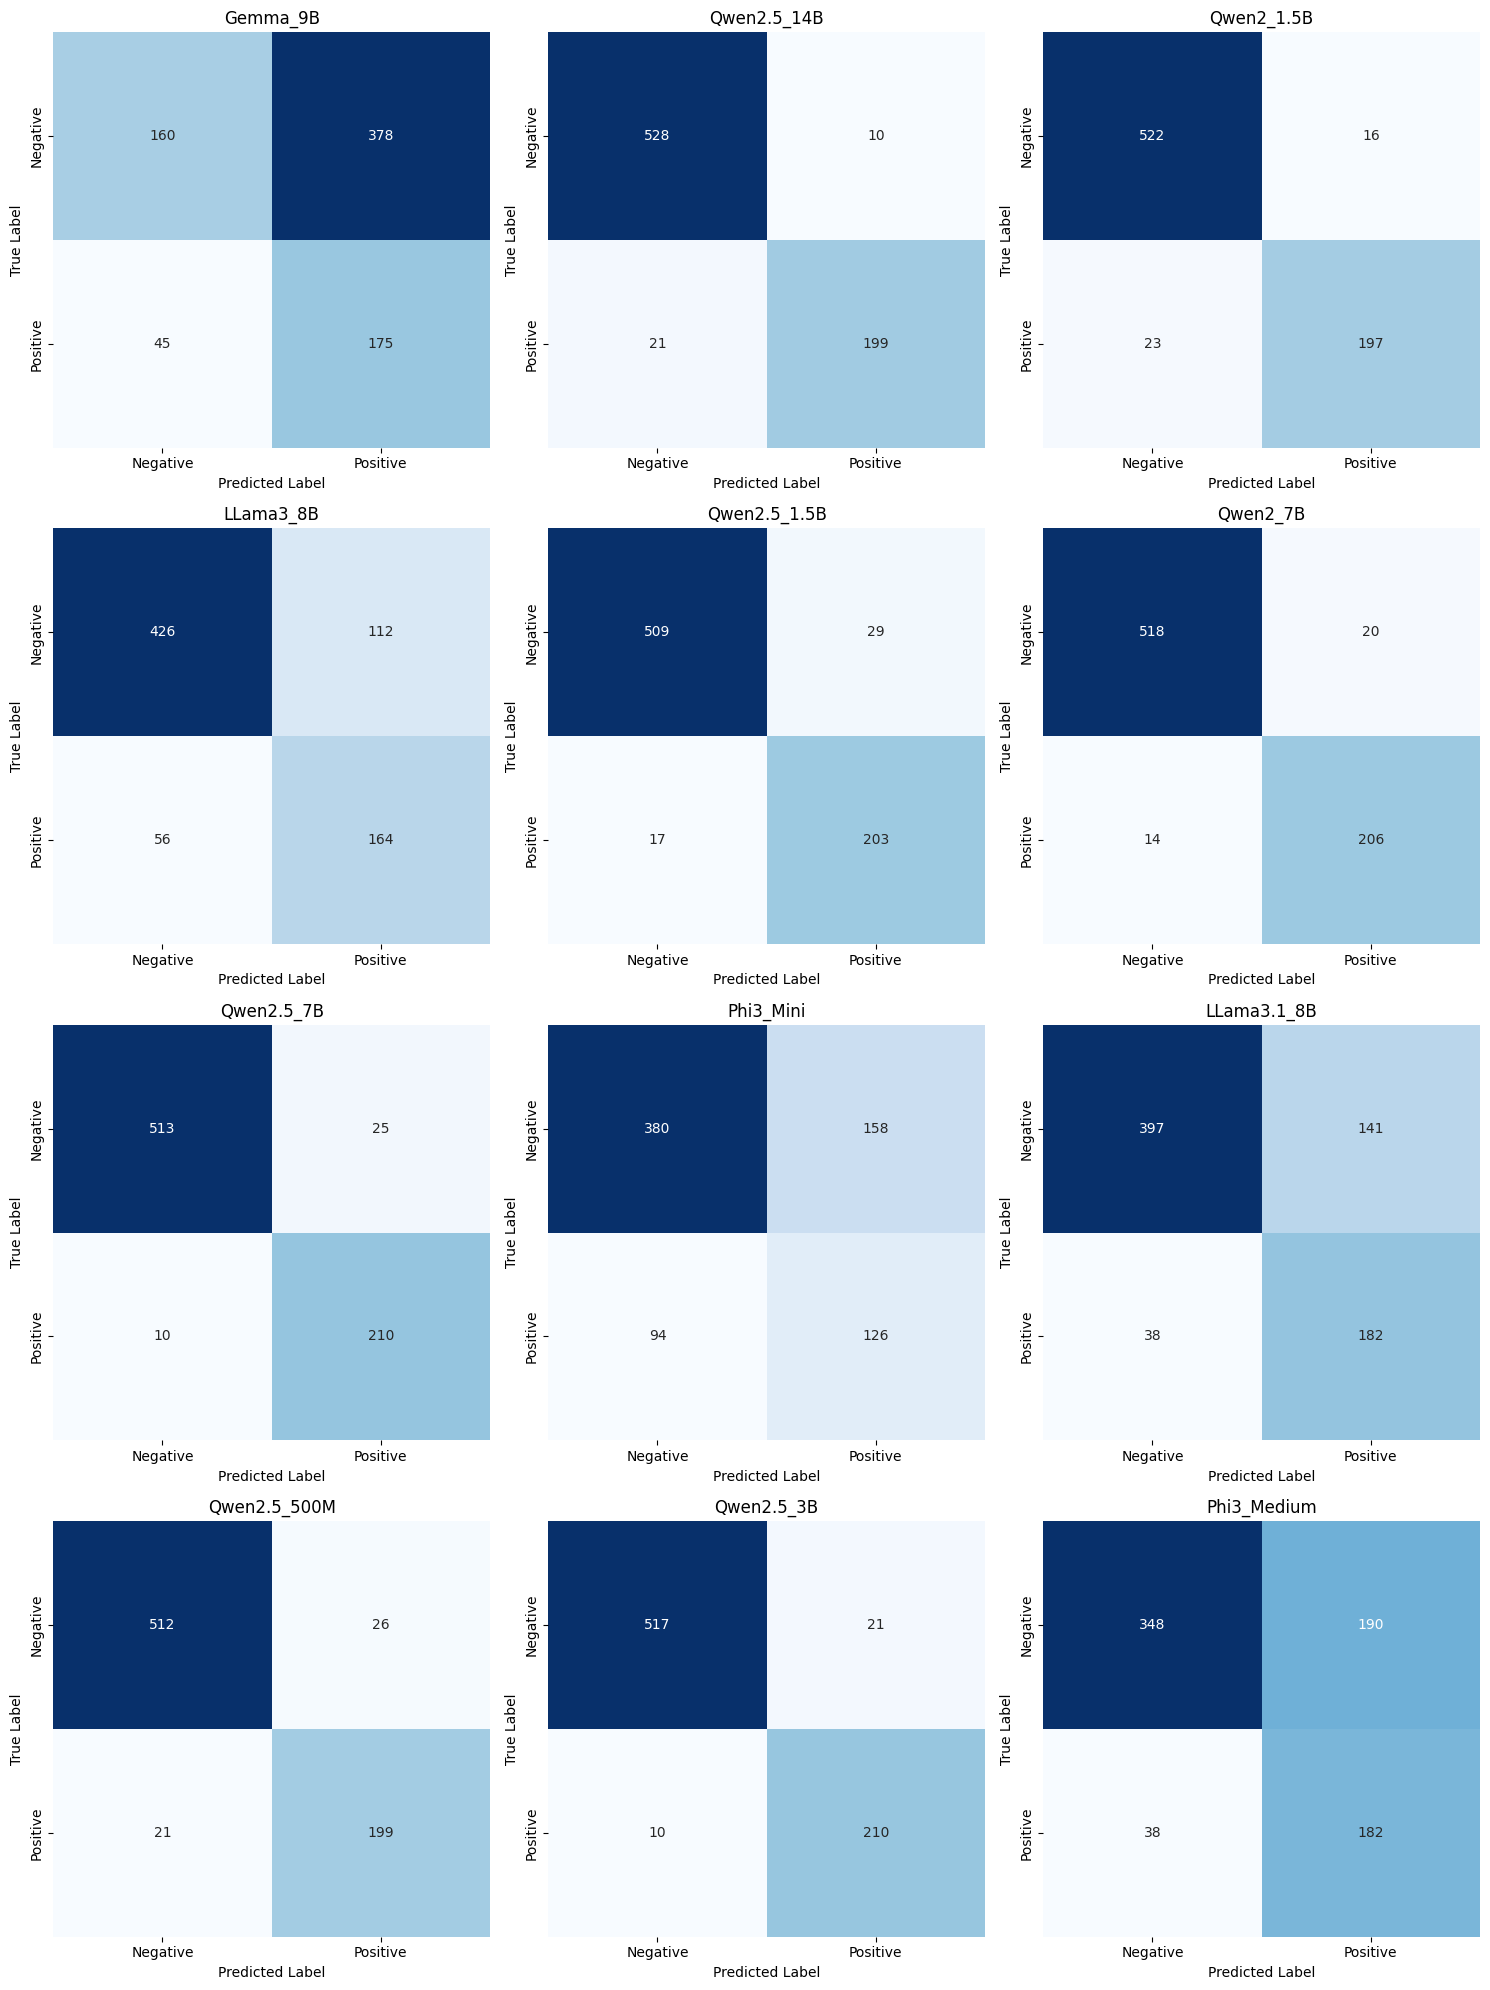

✅ Confusion matrix successfully saved at: /home/joaopedro/joaopedro/llm/Mestrado/curvaROC/confusion_matrices_no_colorbar.png


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_confusion_matrices(folder_path):
    confusion_data = []

    #Iterate through files in the folder
    for file in os.listdir(folder_path):
        if file.startswith("confusion_matrix_") and file.endswith(".txt"):
            model_name = file.replace("confusion_matrix_", "").replace(".txt", "")  #Extract model name
            file_path = os.path.join(folder_path, file)

            #Load the confusion matrix
            matrix = np.loadtxt(file_path, dtype=int)

            confusion_data.append({"name": model_name, "matrix": matrix})

    return confusion_data

def plot_confusion_matrices_no_colorbar(folder_path, output_path):
    #Load confusion matrix data
    confusion_data = load_confusion_matrices(folder_path)

    #Define the number of columns and rows for the subplot
    num_models = len(confusion_data)
    cols = 3  #Number of columns in the grid
    rows = (num_models // cols) + (num_models % cols > 0)  #Dynamically set the number of rows

    #Create the figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()  # Convert the subplot matrix into a list

    #Iterate over models and plot the matrices WITHOUT THE COLOR BAR
    for i, data in enumerate(confusion_data):
        sns.heatmap(
            data["matrix"], annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"],
            ax=axes[i], cbar=False  # Removing the color bar
        )
        axes[i].set_title(data["name"], fontsize=12)
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")

    #Remove empty axes if the number of models is less than the number of subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    #Adjust layout and save the image
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

    print(f"✅ Confusion matrix successfully saved at: {output_path}")

#Define the folder containing the files and the output image path
folder_path = "/home/joaopedro/joaopedro/llm/Mestrado/curvaROC"
output_image = os.path.join(folder_path, "confusion_matrices_no_colorbar.png")

#Generate and save confusion matrices WITHOUT THE COLOR BAR
plot_confusion_matrices_no_colorbar(folder_path, output_image)

**Show metrics results**

In [11]:
import os
import numpy as np
import pandas as pd

def load_metrics(folder_path):
    metrics_data = []

    #Iterate through files in the folder
    for file in os.listdir(folder_path):
        if file.startswith("metrics_") and file.endswith(".txt"):
            model_name = file.replace("metrics_", "").replace(".txt", "")  #Extract model name
            file_path = os.path.join(folder_path, file)

            #Dictionary to store model metrics
            model_metrics = {"Model": model_name}

            #Read metrics from the file
            with open(file_path, "r") as f:
                lines = f.readlines()
                for line in lines:
                    if ":" in line:
                        key, value = line.strip().split(": ")
                        try:
                            model_metrics[key.lower()] = float(value)
                        except ValueError:
                            pass  #Ignore non-numeric values

            metrics_data.append(model_metrics)

    return metrics_data

def rank_models_by_metrics(folder_path):
    #Load metric data
    metrics_data = load_metrics(folder_path)

    #Create a DataFrame with the metric data
    df = pd.DataFrame(metrics_data)

    #Sort models by F1-Score (or another metric if needed)
    df = df.sort_values(by="f1-score", ascending=False)

    return df

#Define the folder containing the metric files
folder_path = "/home/joaopedro/joaopedro/llm/Mestrado/curvaROC"

#Get models sorted by best performance
df_metrics = rank_models_by_metrics(folder_path)

#Display results in the terminal
print(df_metrics)

#If running in Jupyter Notebook, display results in a more organized way
from IPython.display import display
display(df_metrics)

#Save results to a CSV file
output_csv = os.path.join(folder_path, "ranking_models.csv")
df_metrics.to_csv(output_csv, index=False)
print(f"📁 File 'ranking_models.csv' successfully saved at: {output_csv}")


           Model  accuracy  precision  recall  f1-score     auc
11    Qwen2.5_3B    0.9591     0.9091  0.9545    0.9313  0.9858
3    Qwen2.5_14B    0.9591     0.9522  0.9045    0.9277  0.9810
9       Qwen2_7B    0.9551     0.9115  0.9364    0.9238  0.9770
6     Qwen2.5_7B    0.9538     0.8936  0.9545    0.9231  0.9890
2     Qwen2_1.5B    0.9485     0.9249  0.8955    0.9099  0.9769
5   Qwen2.5_1.5B    0.9393     0.8750  0.9227    0.8982  0.9769
4   Qwen2.5_500M    0.9380     0.8844  0.9045    0.8944  0.9759
7    LLama3.1_8B    0.7639     0.5635  0.8273    0.6703  0.8489
1      LLama3_8B    0.7784     0.5942  0.7455    0.6613  0.8441
8    Phi3_Medium    0.6992     0.4892  0.8273    0.6149  0.7936
10     Phi3_Mini    0.6675     0.4437  0.5727    0.5000  0.6813
0       Gemma_9B    0.4420     0.3165  0.7955    0.4528  0.5310


,Model,accuracy,precision,recall,f1-score,auc
11,Qwen2.5_3B,0.9591,0.9091,0.9545,0.9313,0.9858
3,Qwen2.5_14B,0.9591,0.9522,0.9045,0.9277,0.9810
9,Qwen2_7B,0.9551,0.9115,0.9364,0.9238,0.9770
6,Qwen2.5_7B,0.9538,0.8936,0.9545,0.9231,0.9890
2,Qwen2_1.5B,0.9485,0.9249,0.8955,0.9099,0.9769
5,Qwen2.5_1.5B,0.9393,0.8750,0.9227,0.8982,0.9769
4,Qwen2.5_500M,0.9380,0.8844,0.9045,0.8944,0.9759
7,LLama3.1_8B,0.7639,0.5635,0.8273,0.6703,0.8489
1,LLama3_8B,0.7784,0.5942,0.7455,0.6613,0.8441
8,Phi3_Medium,0.6992,0.4892,0.8273,0.6149,0.7936


📁 File 'ranking_models.csv' successfully saved at: /home/joaopedro/joaopedro/llm/Mestrado/curvaROC/ranking_models.csv
